In [36]:
TPos = [20,50,60,80,88,90,95,96,97,98]
FPos = [2,5,10,20,30,40,50,60,70,80]
answer = []
count = 0
for i in TPos:
    print('tp= ', i)
    fp = FPos[count]
    print('fp= ', fp)
    result = i/(i+fp)
    print('result is ', result)
    answer.append(result)
    count +=1
print(answer)

tp=  20
fp=  2
result is  0.9090909090909091
tp=  50
fp=  5
result is  0.9090909090909091
tp=  60
fp=  10
result is  0.8571428571428571
tp=  80
fp=  20
result is  0.8
tp=  88
fp=  30
result is  0.7457627118644068
tp=  90
fp=  40
result is  0.6923076923076923
tp=  95
fp=  50
result is  0.6551724137931034
tp=  96
fp=  60
result is  0.6153846153846154
tp=  97
fp=  70
result is  0.5808383233532934
tp=  98
fp=  80
result is  0.550561797752809
[0.9090909090909091, 0.9090909090909091, 0.8571428571428571, 0.8, 0.7457627118644068, 0.6923076923076923, 0.6551724137931034, 0.6153846153846154, 0.5808383233532934, 0.550561797752809]


In [37]:
TPos = [20,50,60,80,88,90,95,96,97,98]
FNeg = [80,50,40,20,12,10,5,4,3,2]
ans = []
count = 0
for i in TPos:
    print('tp= ', i)
    fn = FNeg[count]
    print('fp= ', fn)
    result = i/(i+fn)
    print('result is ', result)
    ans.append(result)
    count +=1
print(ans)

tp=  20
fp=  80
result is  0.2
tp=  50
fp=  50
result is  0.5
tp=  60
fp=  40
result is  0.6
tp=  80
fp=  20
result is  0.8
tp=  88
fp=  12
result is  0.88
tp=  90
fp=  10
result is  0.9
tp=  95
fp=  5
result is  0.95
tp=  96
fp=  4
result is  0.96
tp=  97
fp=  3
result is  0.97
tp=  98
fp=  2
result is  0.98
[0.2, 0.5, 0.6, 0.8, 0.88, 0.9, 0.95, 0.96, 0.97, 0.98]


In [38]:
FPos = [2,5,10,20,30,40,50,60,70,80]
TPos = [20,50,60,80,88,90,95,96,97,98]
FNeg = [80,50,40,20,12,10,5,4,3,2]
f1List = []
count = 0
for i in TPos:
    fn = FNeg[count]
    fp = FPos[count]
    f1 = (2*i)/((2*i)+fp+fn)
    f1List.append(f1)
    count +=1
print(f1List)

[0.32786885245901637, 0.6451612903225806, 0.7058823529411765, 0.8, 0.8073394495412844, 0.782608695652174, 0.7755102040816326, 0.75, 0.7265917602996255, 0.7050359712230215]


In [39]:
sensitivity = []
count = 0
for i in TPos:
    fn = FNeg[count]
    result = i/(i+fn)
    sensitivity.append(result)
    count +=1
print(sensitivity)

[0.2, 0.5, 0.6, 0.8, 0.88, 0.9, 0.95, 0.96, 0.97, 0.98]


In [40]:
TN = [98,95,90,80,70,60,50,40,30,20]
specificity = []
count = 0
for i in TN:
    fp = FPos[count]
    result = i/(i+fp)
    res = 1-result
    specificity.append(res)
    count +=1
print(specificity)
    


[0.020000000000000018, 0.050000000000000044, 0.09999999999999998, 0.19999999999999996, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.8]


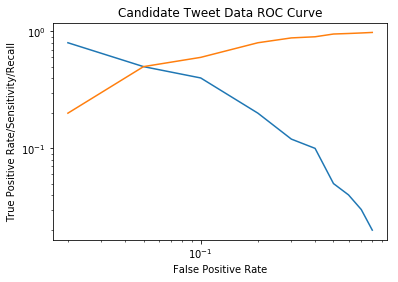

In [41]:
#make ROC curve
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
x = specificity
y = sensitivity
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate/Sensitivity/Recall')
plt.title('Candidate Tweet Data ROC Curve')
plt.plot(x,y)
plt.show()
auc = np.trapz(y,x)

In [42]:
#find false pos
fp_rate = []
count = 0
for i in FPos:
    res = i/(i+TN[count])
    fp_rate.append(res)
    count+=1
print (fp_rate)

[0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


In [43]:
#find false neg
fn_rate = []
count = 0
for i in FNeg:
    res = i/(TPos[count]+i)
    fn_rate.append(res)
    count+=1
print (fn_rate)

[0.8, 0.5, 0.4, 0.2, 0.12, 0.1, 0.05, 0.04, 0.03, 0.02]


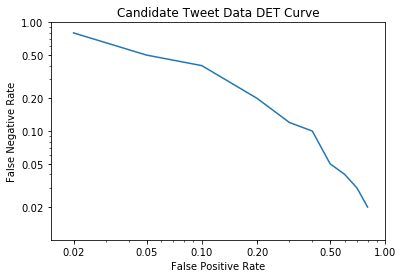

In [57]:
#plot DET for data
#x=fp rate
#y= fn rate
#log scale
#based on Jeremy karnowski's DETCurve function
#fps and fns, ticks, axis, use of pyplot modules determined by me
def DETCurve(fps,fns):
    axis_min = min(fps[0],fns[-1])
    fig,ax = plt.subplots()
    plt.plot(fps,fns)
    plt.yscale('log')
    plt.xscale('log')
    ticks_to_use = [0.02,0.05,0.1,0.2,0.5,1]
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.axis([0.015,1,0.01,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.title('Candidate Tweet Data DET Curve')
    plt.show()
DETCurve(fp_rate,fn_rate)